In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import os

In [2]:
datadir = '/home/mew488/Work/Stars/data'

In [50]:
class HRD:
    
    def __init__(self, datapath):
        self.datapath = datapath
        files = os.listdir(datapath)
        masses = [s[:-7].replace('.','_') for s in files]
        self.masses = masses
        for i in range(len(files)):
            filepath=datapath+'/'+files[i]
            dat = np.loadtxt(filepath)
            setattr(self, masses[i], dat)
            
    def plotTracks(self,zoom=False,zoompt=None, zoomxw=None, zoomyw=None, isochrones=[]):
        fig, ax = plt.subplots(figsize=(20,15))
        if zoom:
            from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
            axins = zoomed_inset_axes(ax, 6.0, loc=3)
            x1, x2, y1, y2 = zoompt[0]-zoomxw, zoompt[0]+zoomxw, \
                            zoompt[1]-zoomyw, zoompt[1]+zoomyw
            midx = zoompt[0]
        max_age = 0
        for key in self.masses[0:]:
            dat = getattr(self, key)
            ages = np.log10(dat[:,10])
            if max(ages) > max_age:
                max_age = max(ages)
            im = ax.scatter(np.log10(dat[:,6]), np.log10(dat[:,2]), c=ages,\
                           cmap=plt.cm.jet)
            if zoom:
                x = np.log10(dat[:,6])
                axins.scatter(2*midx-x, np.log10(dat[:,2]), c=ages,\
                           cmap=plt.cm.jet)
                axins.plot(2*midx-x, np.log10(dat[:,2]), c='k',\
                           alpha=0.1)
                #axins.invert_xaxis()
                
                xloc = 3.69
                idx = np.argmin(np.abs(np.log10(dat[:,6])-xloc))
                yloc = np.log10(dat[:,2])
                yloc = yloc[idx]
                if (yloc < y2) and (yloc > y1):
                    s = key[1:]
                    s = s.replace('_','.')
                    s = s + '$M_{\odot}$'
                    axins.text(2*midx - xloc, yloc, s, fontdict={'size':20})
                    
        for iso in isochrones:
            t_iso = np.log10(iso)
            iso_teff = []
            iso_lum = []
            for key in self.masses[0:]:
                dat = getattr(self,key)
                ages = np.log10(dat[:,10])
                idx = np.argmin(np.abs(ages - t_iso))
                teff = np.log10(dat[:,6])
                lum = np.log10(dat[:,2])
                iso_teff.append(teff[idx])
                iso_lum.append(lum[idx])
            ax.plot(iso_teff, iso_lum, 'k-')
            if zoom:
                axins.plot(2*midx - iso_teff, iso_lum, 'k-')
            ax.text(iso_teff[0], iso_lum[0],'  %.2f'%(t_iso),\
                   fontdict={'size':20})
            
        ax.invert_xaxis()
        #if zoom:
            #axins.invert_xaxis()
        cbar=plt.colorbar(im,ax=ax)
        cbar.ax.tick_params(labelsize=30) 
        im.set_clim(0.0, max_age)
        ax.set_ylabel('Log($L/L_{\odot}$)',size=40)
        ax.set_xlabel('Log($T_{eff}$)',size=40)
        ax.set_title('HR Diagram',size=40)
        
        ax.tick_params(axis='both',labelsize=30)
        
        if zoom:
            axins.set_xlim(x1, x2) # apply the x-limits
            axins.set_ylim(y1, y2) # apply the y-limits
            from mpl_toolkits.axes_grid1.inset_locator import mark_inset
            mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
            axins.tick_params(
                axis='both',         
                which='both',     
                bottom='off', 
                left='off',    
                top='off',        
                labelbottom='off',
                labelleft='off')
            #axins.invert_xaxis()
            return fig, ax, axins
        return fig, ax

In [51]:
hrd = HRD(datadir)

In [52]:
hrd.masses
hrd.masses[0] = 'm0_1'
hrd.masses[1] = 'm0_13'
hrd.masses[2] = 'm0_16'
hrd.masses[3] = 'm0_2'
hrd.masses[4] = 'm0_25'

In [53]:
f, ax = hrd.plotTracks(isochrones=[1e5,1e6,5e6,1e10])

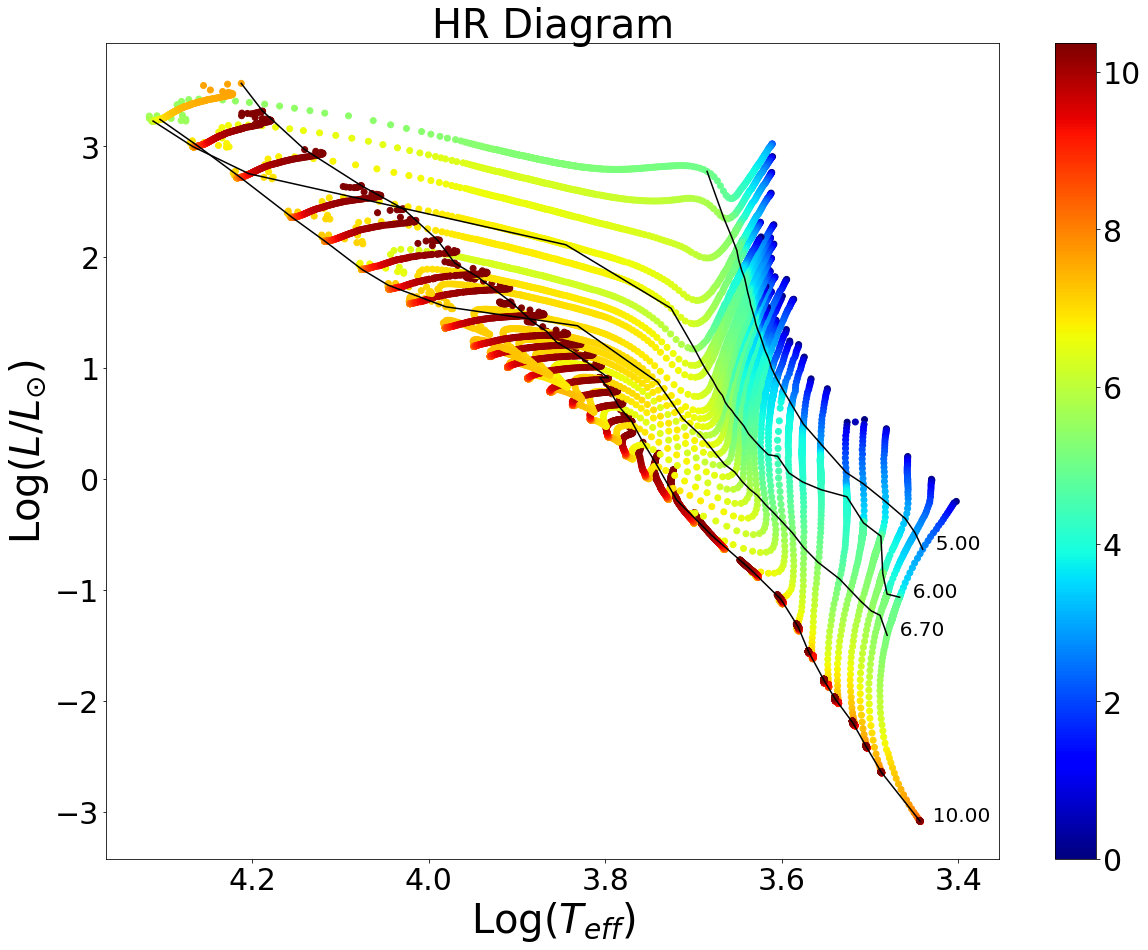

In [77]:
f

In [55]:
#ax.scatter(np.log10(4570),np.log10(0.9),marker='*',c='k',s=400)
Teff = 4570
lum = 0.9


In [73]:
f2, ax2, axins = hrd.plotTracks(zoom=True, zoompt=[np.log10(Teff), np.log10(lum)],zoomxw=.05,zoomyw=.25,isochrones=[1e5,1e6,5e6,8.5e6,12e6,1e10])

In [75]:
Teff_err = 0.05*Teff
lum_err = 0.20*lum
T_err = [[np.log10((Teff+Teff_err)/Teff)],[np.log10(Teff/(Teff-Teff_err))]]
L_err = [[np.log10(lum/(lum-lum_err))],[np.log10((lum+lum_err)/lum)]]

print T_err
print L_err

ax2.errorbar(np.log10(Teff), np.log10(lum),xerr=T_err, yerr=L_err, \
            fmt='k*',markersize=10)
axins.errorbar(np.log10(Teff), np.log10(lum),xerr=T_err, yerr=L_err, \
            fmt='k*',markersize=20)

[[0.021189299069938092], [0.022276394711152211]]
[[0.09691001300805642], [0.079181246047624818]]


<Container object of 3 artists>

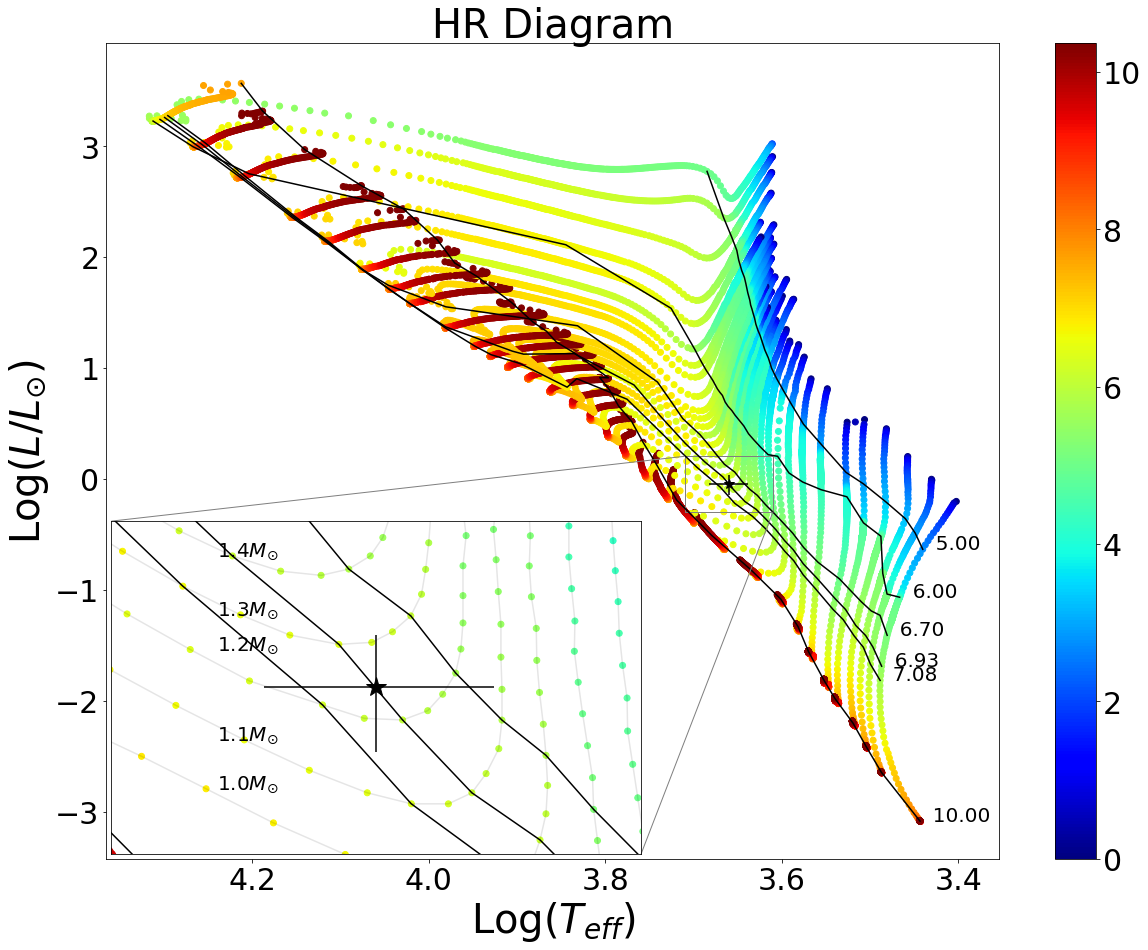

In [76]:
f2

In [79]:
f.savefig('HR_diagram_isochrones.png')
f2.savefig('HR_diagram_zoom.png')